# Librerie e Serie dati

In [1]:
%load_ext autoreload
%autoreload 2


import matplotlib
from matplotlib import style
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

import yfinance as yf
import datetime as dt
#import seaborn as sns
import pandas as pd
import numpy as np
import math
from time import time
import sys
import os

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef
from sklearn.metrics import mean_squared_error, roc_auc_score, r2_score

from nsp.nsp_utils import find_result, find_gap, find_hldif, find_emad, find_stoch, find_volat, segnale_base

from nsp.serie_process import Serie

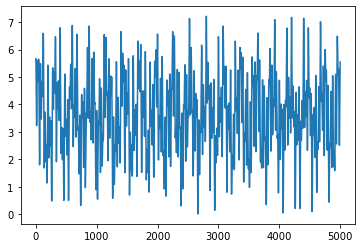

In [2]:
T = 5000
x = np.arange(0,T)
y=  np.sin(4.3*np.pi*x/200)+np.cos(8*np.pi*x/100)+np.cos(2.5*np.pi*x/50)+np.sin(0.9*np.pi*x/123)
y = y + abs(min(y)) + 0.01
plt.plot(x, y)

### Serie giornaliera

In [6]:
bitcoin_storico1 = '../bitcoin/Binance_BTCUSDT_d.csv'
df_bitcoin = pd.read_csv(bitcoin_storico1, skiprows=1)
df_bitcoin['Date'] = pd.to_datetime(df_bitcoin['Date'])
df_bitcoin.sort_values('Date', inplace=True)

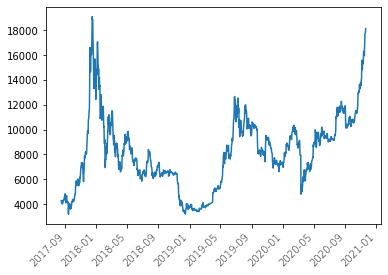

In [89]:
plt.plot(df_bitcoin['Date'], df_bitcoin['Close'])
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium',
);

### Serie tempo reale

In [9]:
bitcoin_temporeale = '../bitcoin/BTCUSDT_Binance_Q3_2020_prints.csv'
df = pd.read_csv(bitcoin_temporeale)#, skiprows=1)
df_bitcoin_temporeale = df[['date', 'price']]
df_bitcoin_temporeale['Date'] = pd.to_datetime(df_bitcoin_temporeale['date'])
df_bitcoin_temporeale.sort_values('Date', inplace=True)
df_bitcoin_temporeale = df_bitcoin_temporeale.drop('date', axis=1)

/home/daniele/miniconda3/envs/stockpredictor/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/daniele/miniconda3/envs/stockpredictor/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [131]:
df

,unix,date,symbol,price,amount,dollar_amount,type,trans_id
0,1593475455736,2020-06-30 00:04:15.736,BTC/USDT,9199.26,0.004000,36.797040,buy,348502698
1,1593475455918,2020-06-30 00:04:15.918,BTC/USDT,9198.54,0.002173,19.988427,sell,348502699
2,1593475455982,2020-06-30 00:04:15.982,BTC/USDT,9198.01,0.021029,193.424952,buy,348502702
3,1593475455988,2020-06-30 00:04:15.988,BTC/USDT,9198.00,0.051420,472.961160,sell,348502703
4,1593475456048,2020-06-30 00:04:16.048,BTC/USDT,9198.01,0.100000,919.801000,buy,348502704
...,...,...,...,...,...,...,...,...
1364413,1601508934480,2020-09-30 23:35:34.480,BTC/USDT,10774.32,0.000029,0.312455,sell,425905149
1364414,1601508934554,2020-09-30 23:35:34.554,BTC/USDT,10774.33,0.007898,85.095658,buy,425905151
1364415,1601508934584,2020-09-30 23:35:34.584,BTC/USDT,10774.32,0.073022,786.762395,sell,425905153
1364416,1601508934774,2020-09-30 23:35:34.774,BTC/USDT,10774.32,0.033613,362.157218,sell,425905154


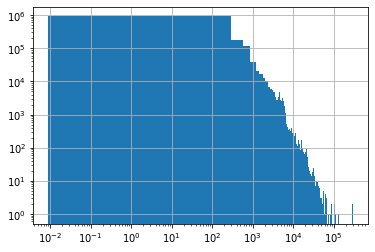

In [79]:
fig, ax = plt.subplots()
#df.set_index('date')
df.dollar_amount.hist(bins=1000)#, range=(0,25))
ax.set_yscale('log')
ax.set_xscale('log')

<AxesSubplot:xlabel='date'>

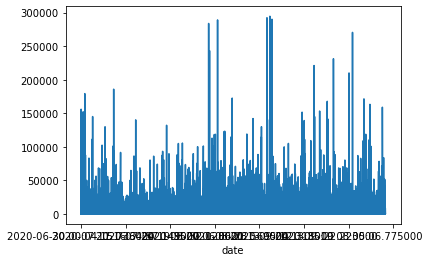

In [72]:
fig, ax = plt.subplots()
df.set_index('date').dollar_amount.plot()#range=(0,25))
#ax.set_yscale('log')

In [97]:
df['date'] = pd.to_datetime(df['date'])
serie=df.set_index('date')
serie_1ora = serie.resample('60min').sum()
serie_1min = serie.resample('1min').sum()

<AxesSubplot:xlabel='date'>

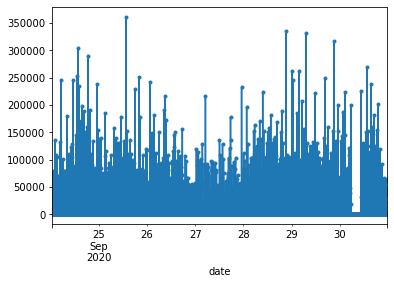

In [129]:
fig, ax = plt.subplots()
serie_1min.dollar_amount[-10000:].plot(marker='.')
#ax.set_yscale('log')

<AxesSubplot:xlabel='date'>

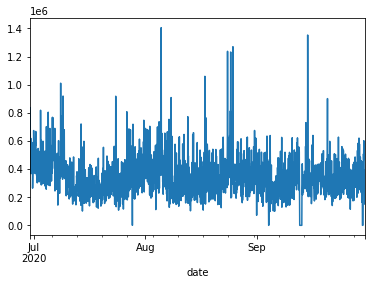

<AxesSubplot:xlabel='date'>

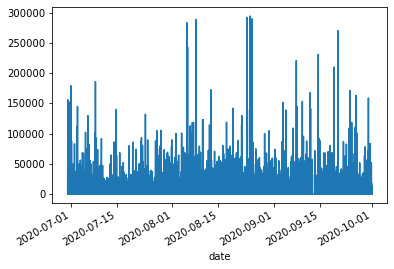

In [90]:
serie.dollar_amount.plot()

In [130]:
df_bitcoin_temporeale

,price,Date
0,9199.26,2020-06-30 00:04:15.736
1,9198.54,2020-06-30 00:04:15.918
2,9198.01,2020-06-30 00:04:15.982
3,9198.00,2020-06-30 00:04:15.988
4,9198.01,2020-06-30 00:04:16.048
...,...,...
1364413,10774.32,2020-09-30 23:35:34.480
1364414,10774.33,2020-09-30 23:35:34.554
1364415,10774.32,2020-09-30 23:35:34.584
1364416,10774.32,2020-09-30 23:35:34.774


In [ ]:
sinusoide = Serie(x,y)

In [11]:
bitcoin = Serie(df_bitcoin['Date'].values,  df_bitcoin['Close'].values, 'Close')

In [12]:
btc_minuto = Serie(df_bitcoin_temporeale['Date'].values, df_bitcoin_temporeale['price'].values, 'price')

### Indicatori aggiuntivi

In [13]:
# Period of Fast EMA
fast_emad = 8 #@param {type:"slider", min:1, max:16, step:1}
# Period of Slow EMA
slow_emad = 18 #@param {type:"slider", min:1, max:32, step:1}
# K period for the stochastic oscillator
k_stoch = 5 #@param {type:"slider", min:1, max:16, step:1}
# Smoothing Period for Stochastic Oscillator
smooth_stoch = 3 #@param {type:"slider", min:1, max:8, step:1}
# Volatility Calculation Period
period_volat = 6 #@param {type:"slider", min:1, max:16, step:1}
# Autocorrelation period
window_autocorr = 30 #@param {type:"slider", min:10, max:90, step:5}
# Autocorrelation lag
lag_autocorr = 4 #@param {type:"slider", min:1, max:10, step:1}

In [4]:
sinusoide.aggiungi_indicatori(window_autocorr, lag_autocorr, fast_emad, slow_emad, period_volat, k_stoch, smooth_stoch)

In [14]:
bitcoin.aggiungi_indicatori(window_autocorr, lag_autocorr, fast_emad, slow_emad, period_volat, k_stoch, smooth_stoch)

In [15]:
bitcoin.new_data

,Date,AUTCOR,Close,EMAD,VOLAT
0,2017-09-16,0.625651,0.031668,0.0,0.0
1,2017-09-17,0.629224,0.030726,0.0,0.0
2,2017-09-18,0.460450,0.051809,0.0,0.0
3,2017-09-19,0.440944,0.043945,0.0,0.0
4,2017-09-20,0.440500,0.043313,0.0,0.0
...,...,...,...,...,...
1145,2020-11-16,0.402265,0.849657,0.0,0.0
1146,2020-11-17,0.391202,0.909176,0.0,0.0
1147,2020-11-18,0.402551,0.916522,0.0,0.0
1148,2020-11-19,0.410291,0.918202,0.0,0.0


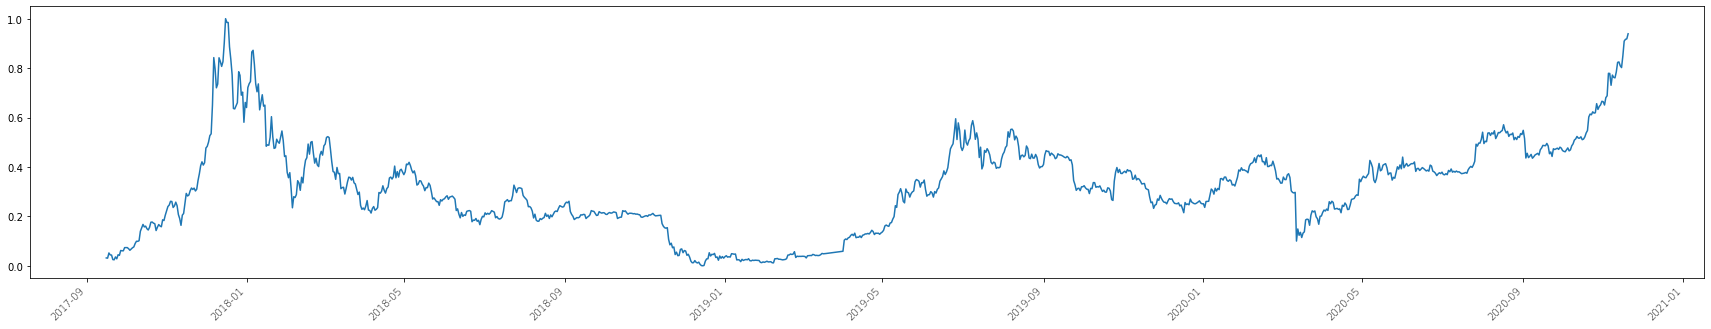

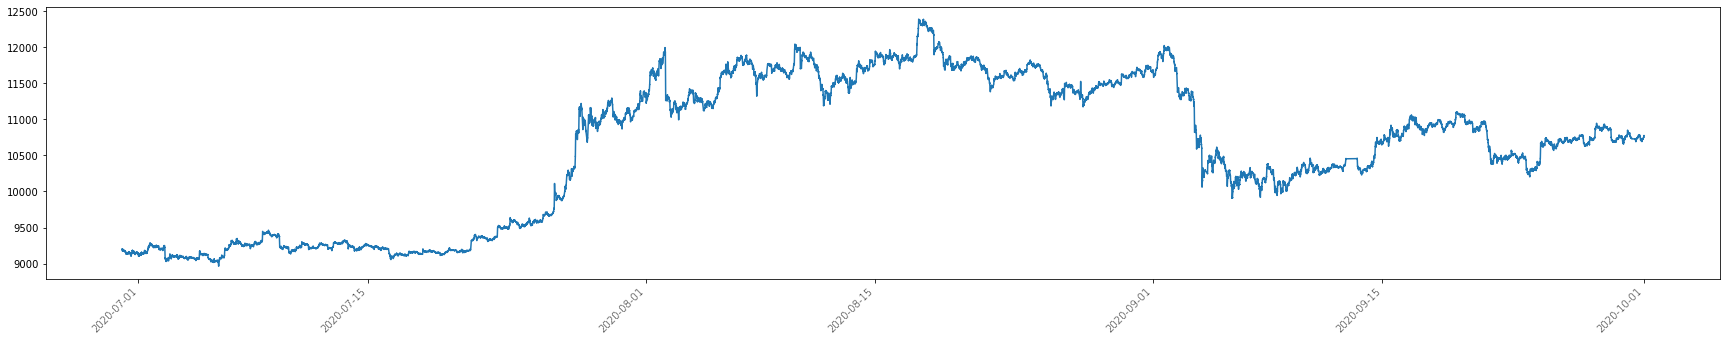

In [16]:
def plot_serie(serie, x, y):
    plt.figure(figsize=(30,5))
    plt.plot(serie[x], serie[y] )
    plt.xticks(
        rotation=45,
        horizontalalignment='right',
        fontweight='light',
        fontsize='medium',
    );
    
plot_serie(bitcoin.new_data, 'Date', bitcoin.NOME_VALORE)
plot_serie(btc_minuto.df.reset_index(), 'Date', btc_minuto.NOME_VALORE)

In [25]:
bitcoin.new_data#['Date']

,Date,AUTCOR,Close,EMAD,VOLAT
0,2017-09-16,0.625651,0.031668,0.0,0.0
1,2017-09-17,0.629224,0.030726,0.0,0.0
2,2017-09-18,0.460450,0.051809,0.0,0.0
3,2017-09-19,0.440944,0.043945,0.0,0.0
4,2017-09-20,0.440500,0.043313,0.0,0.0
...,...,...,...,...,...
1145,2020-11-16,0.402265,0.849657,0.0,0.0
1146,2020-11-17,0.391202,0.909176,0.0,0.0
1147,2020-11-18,0.402551,0.916522,0.0,0.0
1148,2020-11-19,0.410291,0.918202,0.0,0.0


In [26]:
btc_minuto.df#.index

,price
Date,
2020-06-30 00:04:15.736,9199.26
2020-06-30 00:04:15.918,9198.54
2020-06-30 00:04:15.982,9198.01
2020-06-30 00:04:15.988,9198.00
2020-06-30 00:04:16.048,9198.01
...,...
2020-09-30 23:35:34.480,10774.32
2020-09-30 23:35:34.554,10774.33
2020-09-30 23:35:34.584,10774.32


In [27]:
WINDOW = 32   #da 10 a 90...
EMB_SIZE = 4  
PERCENT = 0.2   #test data
STEP = 1 
FORECAST = 1

data, label = btc_minuto.crea_pezzetti_window(WINDOW, STEP, FORECAST)
X_train, X_test, Y_train, Y_test = Serie.create_Xt_Yt(data, label, PERCENT)